In [10]:
#Tutorial from https://www.youtube.com/watch?v=AACPaoDsd50
#Using deep learning neural networks
import sys
print(sys.version)
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
import numpy as np
import matplotlib.pyplot as plt

3.7.7 (default, Apr 15 2020, 05:09:04) [MSC v.1916 64 bit (AMD64)]
2.1.0
2.2.4-tf


In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt','Sneaker',
              'Bag', 'Ankle boot']

In [19]:
#Understand the data
print(train_images.shape) 
print(len(train_labels))
print(train_labels)
print(test_images.shape)
len(test_labels)
#28pix

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)


10000

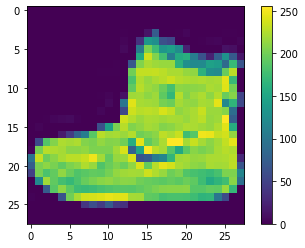

In [21]:
#Show the image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_images = train_images/255.0
test_images = test_images/255.0
#Preprocess the same

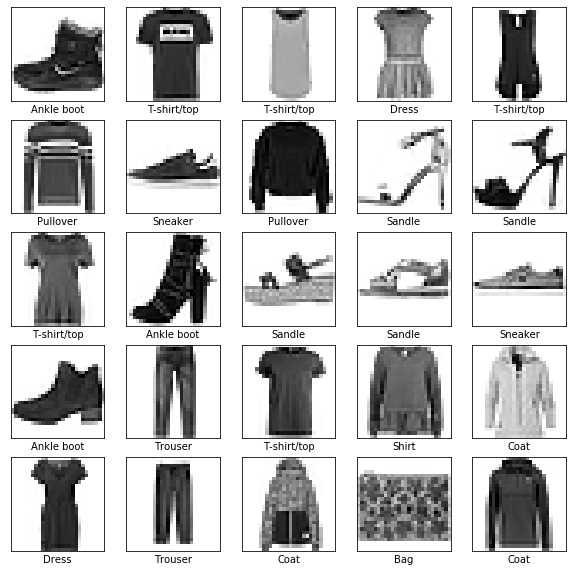

In [24]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
#Adding the parameters and layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu), #128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax) #return array of 10 nodes
])

In [30]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', #loss function
             metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.4978 - accuracy: 0.8262
Epoch 2/10
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3754 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3373 - accuracy: 0.8774
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3130 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2953 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2795 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2685 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2578 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2481 - accuracy: 0.9072
Epoch 1

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)
#overfitting because it accuracy is lower than the test accuracy

10000/10000 [==============================] - 0s 49us/sample - loss: 0.3452 - accuracy: 0.8803
Test Accuracy: 0.8803


In [34]:
predictions = model.predict(test_images)
predictions[0] #The prediction of different classification labels that are associated with the value

array([2.9962476e-07, 5.6797023e-10, 1.1773815e-09, 2.0234182e-07,
       4.9002601e-08, 7.0427207e-04, 2.6374698e-07, 3.3543926e-02,
       9.8708192e-08, 9.6575093e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array,true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

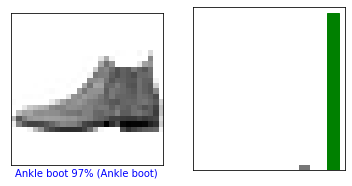

In [41]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

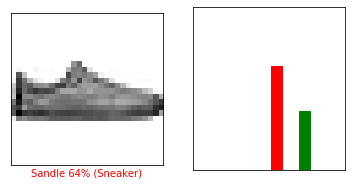

In [42]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

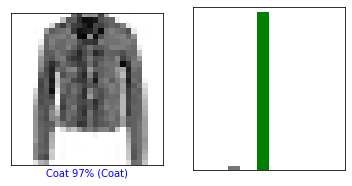

In [44]:
i = 10
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

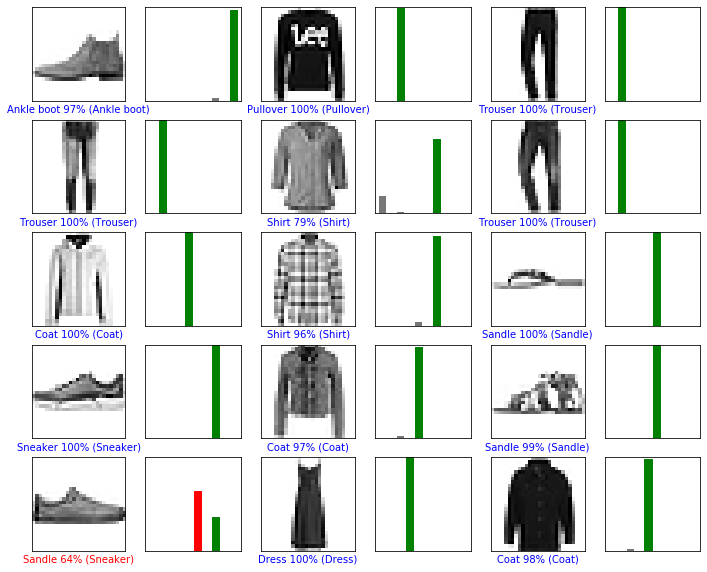

In [49]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols,2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [53]:
img = test_images[0]
img = (np.expand_dims(img,0)) # batches of a single image
img.shape

(1, 28, 28)

In [55]:
predictions_single = model.predict(img)
predictions_single

array([[2.9962476e-07, 5.6797023e-10, 1.1773815e-09, 2.0234182e-07,
        4.9002601e-08, 7.0427143e-04, 2.6374650e-07, 3.3543926e-02,
        9.8708192e-08, 9.6575093e-01]], dtype=float32)

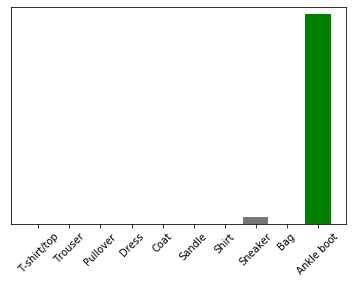

In [57]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10),class_names, rotation = 45)

In [58]:
np.argmax(predictions_single[0])

9